https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# input data
df_train = pd.read_csv('~/Desktop/train.csv').drop('Id', axis = 1)
df_test = pd.read_csv('~/Desktop/test.csv').drop('Id', axis = 1)
test_id = pd.read_csv('~/Desktop/test.csv')['Id']
df_train['SalePrice'] = np.sqrt(df_train['SalePrice'])

## Handle Missing Values

In [2]:
#######################################################################
# Data Imputing

# impute features to 'None'
columns_impute_none = ['Alley', 'MiscFeature', 'Fence', 'PoolQC', 'GarageCond', 'GarageQual', 
                       'GarageFinish', 'GarageType', 'FireplaceQu', 'BsmtFinType2', 'BsmtFinType1',
                       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Exterior2nd', 'Exterior1st']
for name in columns_impute_none:
    df_train[name] = df_train[name].fillna('None')
    df_test[name] = df_test[name].fillna('None')


# impute features to 0
columns_impute_0 = ['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
                    'GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 'GarageYrBlt']

for name in columns_impute_0:
    df_train[name] = df_train[name].fillna(0)
    df_test[name] = df_test[name].fillna(0)


# impute features to median
columns_impute_median = ['LotFrontage']

for name in columns_impute_median:
    df_train[name] = df_train[name].fillna(df_train[name].median())
    df_test[name] = df_test[name].fillna(df_train[name].median())


# impute features to mode
columns_impute_mode = ['MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Electrical']

for name in columns_impute_mode:
    df_train[name] = df_train[name].fillna(df_train[name].mode()[0])
    df_test[name] = df_test[name].fillna(df_train[name].mode()[0])

## Feature Engineering and EDA

In [3]:
## Ordinal Encodin
df_train['OverallCond'] = df_train['OverallCond'].map({1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5})
df_test['OverallCond'] = df_test['OverallCond'].map({1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5})

df_train['OverallQual'] = df_train['OverallQual'].map({1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5})
df_test['OverallQual'] = df_test['OverallQual'].map({1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5})

df_train['Neighborhood'] = df_train['Neighborhood'].map({'Blmngtn':3, 'Blueste':2, 'BrDale':1, 'BrkSide':2, 'ClearCr':3, 'CollgCr':3, 'Crawfor':4, 
                                                         'Edwards':2, 'Gilbert':3, 'IDOTRR':1, 'MeadowV':1, 'Mitchel':3, 'NAmes':2, 'NPkVill':2, 
                                                         'NWAmes':3, 'NoRidge':5, 'NridgHt':5, 'OldTown':1, 'SWISU':2, 'Sawyer':2, 'SawyerW':3, 
                                                         'Somerst':4, 'StoneBr':5, 'Timber':4, 'Veenker':4})
df_test['Neighborhood'] = df_test['Neighborhood'].map({'Blmngtn':3, 'Blueste':2, 'BrDale':1, 'BrkSide':2, 'ClearCr':3, 'CollgCr':3, 'Crawfor':4, 
                                                         'Edwards':2, 'Gilbert':3, 'IDOTRR':1, 'MeadowV':1, 'Mitchel':3, 'NAmes':2, 'NPkVill':2, 
                                                         'NWAmes':3, 'NoRidge':5, 'NridgHt':5, 'OldTown':1, 'SWISU':2, 'Sawyer':2, 'SawyerW':3, 
                                                         'Somerst':4, 'StoneBr':5, 'Timber':4, 'Veenker':4})

qual_mapping = {'None':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

df_train['ExterQual'] = df_train['ExterQual'].map(qual_mapping)
df_train['ExterCond'] = df_train['ExterCond'].map(qual_mapping)
df_train['BsmtQual'] = df_train['BsmtQual'].map(qual_mapping)
df_train['BsmtCond'] = df_train['BsmtCond'].map(qual_mapping)
df_train['HeatingQC'] = df_train['HeatingQC'].map(qual_mapping)
df_train['KitchenQual'] = df_train['KitchenQual'].map(qual_mapping)
df_train['FireplaceQu'] = df_train['FireplaceQu'].map(qual_mapping)
df_train['GarageQual'] = df_train['GarageQual'].map(qual_mapping)
df_train['GarageCond'] = df_train['GarageCond'].map(qual_mapping)
df_train['PoolQC'] = df_train['PoolQC'].map(qual_mapping)

df_test['ExterQual'] = df_test['ExterQual'].map(qual_mapping)
df_test['ExterCond'] = df_test['ExterCond'].map(qual_mapping)
df_test['BsmtQual'] = df_test['BsmtQual'].map(qual_mapping)
df_test['BsmtCond'] = df_test['BsmtCond'].map(qual_mapping)
df_test['HeatingQC'] = df_test['HeatingQC'].map(qual_mapping)
df_test['KitchenQual'] = df_test['KitchenQual'].map(qual_mapping)
df_test['FireplaceQu'] = df_test['FireplaceQu'].map(qual_mapping)
df_test['GarageQual'] = df_test['GarageQual'].map(qual_mapping)
df_test['GarageCond'] = df_test['GarageCond'].map(qual_mapping)
df_test['PoolQC'] = df_test['PoolQC'].map(qual_mapping)

df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 'BLQ':2,'Rec':3, 'ALQ':4, 'GLQ':5})
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 'BLQ':2,'Rec':3, 'ALQ':4, 'GLQ':5})
df_train['Functional'] = df_train['Functional'].map({'Sal':1, 'Sev':1, 'Maj2':2, 'Maj1':2, 'Mod':3, 'Min2':4, 'Min1':4, 'Typ':5})
df_train['GarageFinish'] = df_train['GarageFinish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
df_train['PavedDrive'] = df_train['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
df_train['Fence'] = df_train['Fence'].map({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':1, 'GdPrv':2})
df_train['GarageType'] = df_train['GarageType'].map({
    '2Types': 5, 'BuiltIn': 4, 'Attchd': 3, 
    'Detchd': 2, 'Basment': 1, 'CarPort': 1, 'None': 0
})

df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 'BLQ':2,'Rec':3, 'ALQ':4, 'GLQ':5})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 'BLQ':2,'Rec':3, 'ALQ':4, 'GLQ':5})
df_test['Functional'] = df_test['Functional'].map({'Sal':1, 'Sev':1, 'Maj2':2, 'Maj1':2, 'Mod':3, 'Min2':4, 'Min1':4, 'Typ':5})
df_test['GarageFinish'] = df_test['GarageFinish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
df_test['PavedDrive'] = df_test['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
df_test['Fence'] = df_test['Fence'].map({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':1, 'GdPrv':2})
df_test['GarageType'] = df_test['GarageType'].map({
    '2Types': 5, 'BuiltIn': 4, 'Attchd': 3, 
    'Detchd': 2, 'Basment': 1, 'CarPort': 1, 'None': 0
})

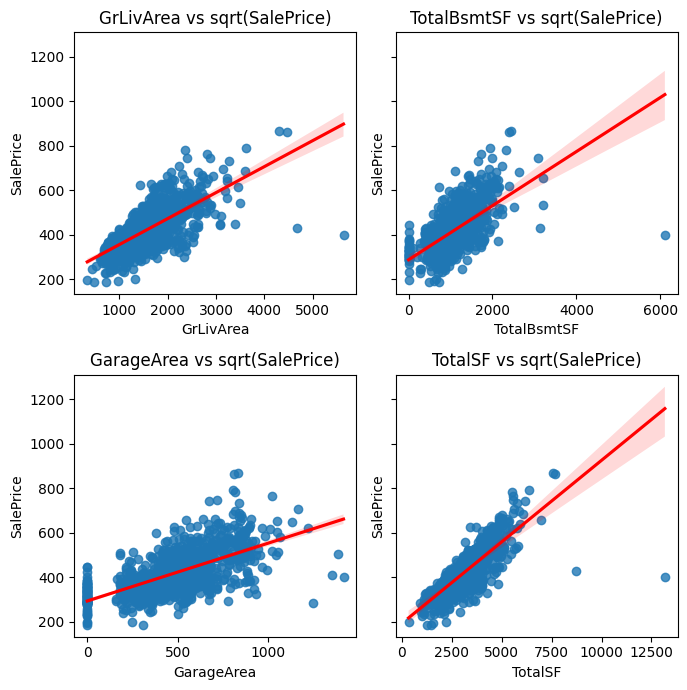

GrLivArea      0.714556
TotalBsmtSF    0.621384
GarageArea     0.647040
TotalSF        0.819595
Name: SalePrice, dtype: float64


In [4]:
## Total SF <- GrLivArea, TotalBsmtSF, GarageArea

df_train['TotalSF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF'] + df_train['GarageArea']
df_test['TotalSF'] = df_test['GrLivArea'] + df_test['TotalBsmtSF'] + df_test['GarageArea']


fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharey=True) 

# Plot each regplot in its respective subplot
sns.regplot(ax=axes[0,0], x='GrLivArea', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,0].set_title("GrLivArea vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,1], x='TotalBsmtSF', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,1].set_title("TotalBsmtSF vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,0], x='GarageArea', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,0].set_title("GarageArea vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,1], x='TotalSF', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,1].set_title("TotalSF vs sqrt(SalePrice)")

plt.tight_layout()
plt.show()

print(df_train.corr(numeric_only=True)['SalePrice'][['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'TotalSF']])

df_train.drop(['GrLivArea','TotalBsmtSF'], axis=1, inplace=True)
df_test.drop(['GrLivArea','TotalBsmtSF'], axis=1, inplace=True)


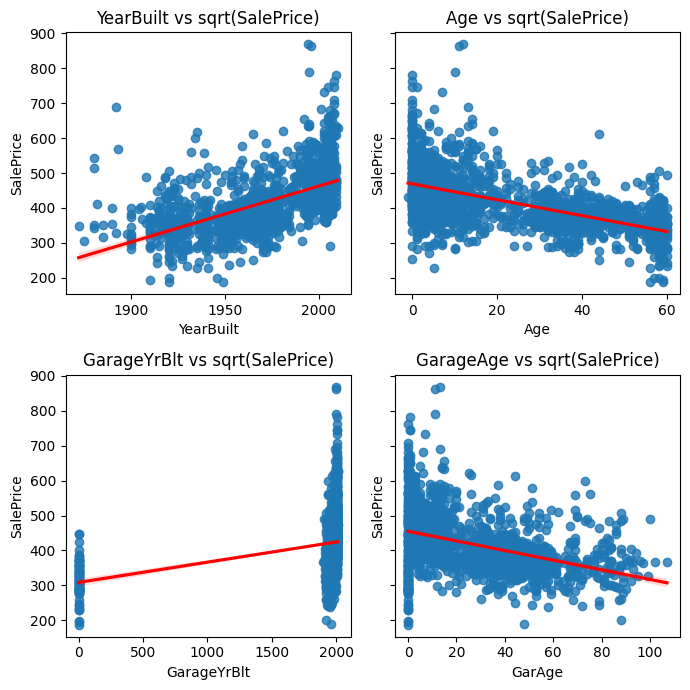

YearBuilt      0.564284
GarageYrBlt    0.306525
Age           -0.547704
GarAge        -0.401821
Name: SalePrice, dtype: float64


In [5]:
# Age <- YrSold, YearBult
# GarAge <- YrSold, GarageYrBlt
    
df_train['Age'] = np.minimum(df_train['YrSold'] - df_train['YearBuilt'], df_train['YrSold'] - df_train['YearRemodAdd']) 
df_test['Age'] = np.minimum(df_test['YrSold'] - df_test['YearBuilt'], df_test['YrSold'] - df_test['YearRemodAdd']) 

df_train['GarAge'] = df_train.apply(lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] > 0 else 0, axis=1)
df_test['GarAge'] = df_test.apply(lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] > 0 else 0, axis=1)

fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharey=True) 

sns.regplot(ax=axes[0,0], x='YearBuilt', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,0].set_title("YearBuilt vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,1], x='Age', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,1].set_title("Age vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,0], x='GarageYrBlt', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,0].set_title("GarageYrBlt vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,1], x='GarAge', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,1].set_title("GarageAge vs sqrt(SalePrice)")

plt.tight_layout()
plt.show()

print(df_train.corr(numeric_only=True)['SalePrice'][['YearBuilt', 'GarageYrBlt', 'Age', 'GarAge']])

df_train.drop(['YearBuilt','YrSold', 'YearRemodAdd', 'MoSold', 'GarageYrBlt'], axis=1, inplace = True)
df_test.drop(['YearBuilt','YrSold', 'YearRemodAdd', 'MoSold', 'GarageYrBlt'], axis=1, inplace = True)

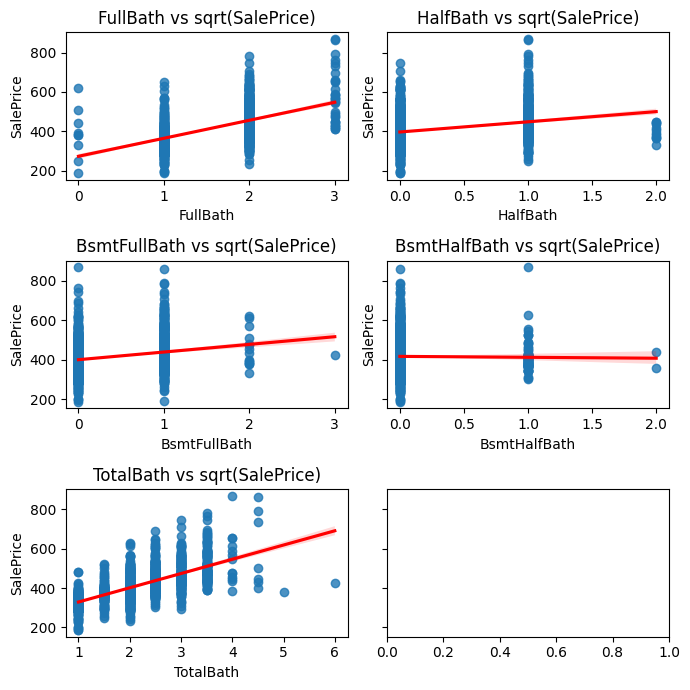

FullBath        0.587268
HalfBath        0.303374
BsmtFullBath    0.235295
BsmtHalfBath   -0.013069
TotalBath       0.662534
Name: SalePrice, dtype: float64


In [6]:
# Total Bath <- FullBath, HalfBath, BsmtFullBath, BsmtHalfBath
df_train['TotalBath'] = df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath'])
df_test['TotalBath'] = df_test['FullBath'] + (0.5 * df_test['HalfBath']) + df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath'])

fig, axes = plt.subplots(3, 2, figsize=(7, 7), sharey=True) 

sns.regplot(ax=axes[0,0], x='FullBath', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,0].set_title("FullBath vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,1], x='HalfBath', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,1].set_title("HalfBath vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,0], x='BsmtFullBath', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,0].set_title("BsmtFullBath vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,1], x='BsmtHalfBath', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,1].set_title("BsmtHalfBath vs sqrt(SalePrice)")

sns.regplot(ax=axes[2,0], x='TotalBath', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[2,0].set_title("TotalBath vs sqrt(SalePrice)")

plt.tight_layout()
plt.show()

print(df_train.corr(numeric_only=True)['SalePrice'][['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBath']])

df_train.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)
df_test.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

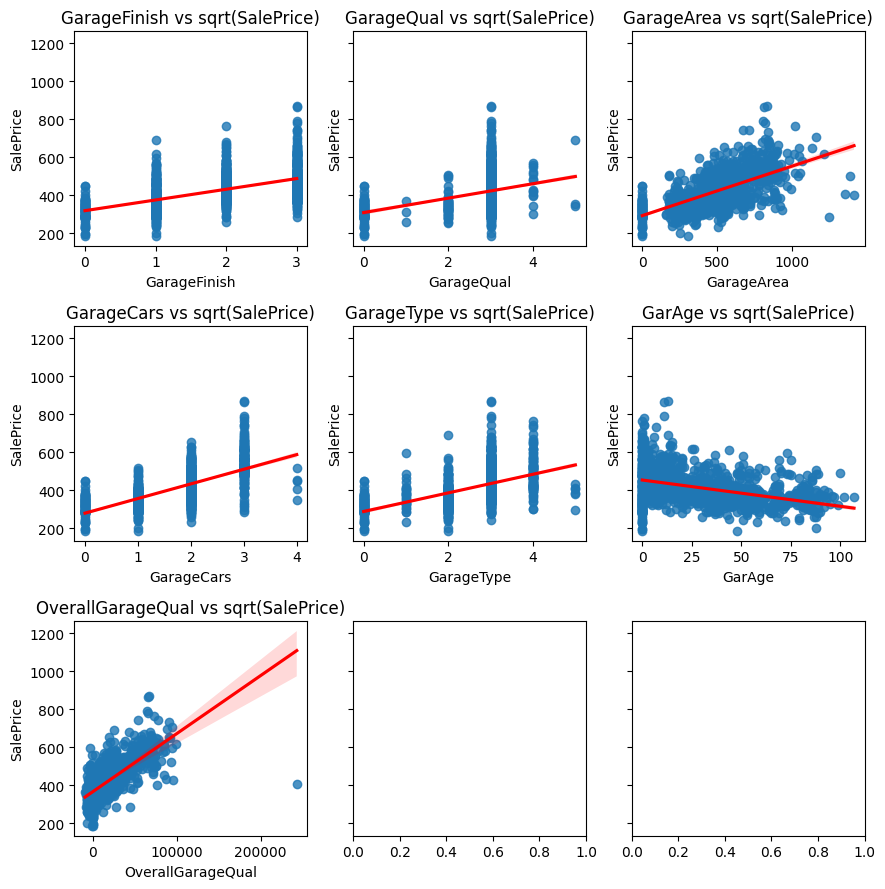

GarageFinish         0.586336
GarageQual           0.320108
GarageArea           0.647040
GarageCars           0.670686
GarageType           0.496937
GarAge              -0.401821
OverallGarageQual    0.732717
Name: SalePrice, dtype: float64


In [7]:
# OverallGarageQual <- GarageFinish, GarageQual, GarageArea, GarageCars, GarageType, GarAge
df_train['OverallGarageQual'] = df_train['GarageFinish'] * df_train['GarageQual'] * df_train['GarageArea']  * df_train['GarageCars'] * df_train['GarageType'] - (df_train['GarAge'] **2)
df_test['OverallGarageQual'] = df_test['GarageFinish'] * df_test['GarageArea'] * df_train['GarageQual'] * df_test['GarageCars'] * df_test['GarageType'] - (df_test['GarAge'] **2)

fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharey=True) 

sns.regplot(ax=axes[0,0], x='GarageFinish', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,0].set_title("GarageFinish vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,1], x='GarageQual', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,1].set_title("GarageQual vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,2], x='GarageArea', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,2].set_title("GarageArea vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,0], x='GarageCars', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,0].set_title("GarageCars vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,1], x='GarageType', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,1].set_title("GarageType vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,2], x='GarAge', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,2].set_title("GarAge vs sqrt(SalePrice)")

sns.regplot(ax=axes[2,0], x='OverallGarageQual', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[2,0].set_title("OverallGarageQual vs sqrt(SalePrice)")

plt.tight_layout()
plt.show()

print(df_train.corr(numeric_only=True)['SalePrice'][['GarageFinish', 'GarageQual', 'GarageArea', 'GarageCars', 'GarageType', 'GarAge', 'OverallGarageQual']])

df_train.drop(['GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'GarageCars', 'GarAge', 'GarageType'], axis=1, inplace=True)
df_test.drop(['GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'GarageCars', 'GarAge', 'GarageType'], axis=1, inplace=True)

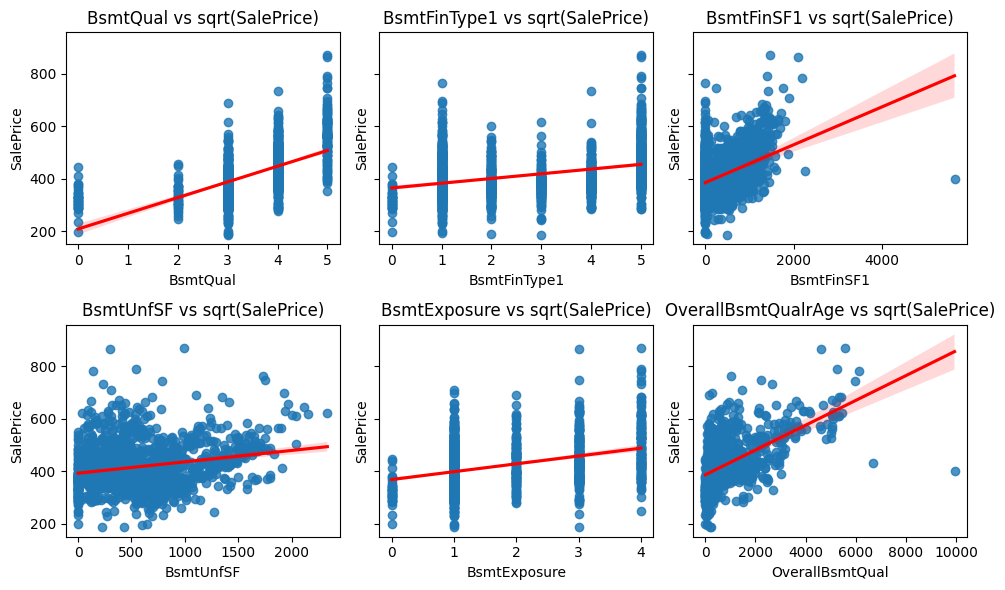

BsmtQual           0.610376
BsmtFinType1       0.353276
BsmtFinSF1         0.383322
BsmtUnfSF          0.222704
BsmtExposure       0.371657
OverallBsmtQual    0.549410
Name: SalePrice, dtype: float64


In [8]:
# OverallBsmtQual <- BsmtQual, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, BsmtExposure
df_train['OverallBsmtQual'] = (df_train['BsmtQual']**2) * (df_train['BsmtFinType1'] * np.sqrt(df_train['BsmtFinSF1']) * 0.5 + 0.5 * np.sqrt(df_train['BsmtUnfSF'])) * (df_train['BsmtExposure'] * 0.5)
df_test['OverallBsmtQual'] = (df_test['BsmtQual']**2) * (df_test['BsmtFinType1'] * np.sqrt(df_test['BsmtFinSF1']) * 0.5 + 0.5 * np.sqrt(df_test['BsmtUnfSF'])) * (df_test['BsmtExposure'] * 0.5)

fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharey=True) 

sns.regplot(ax=axes[0,0], x='BsmtQual', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,0].set_title("BsmtQual vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,1], x='BsmtFinType1', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,1].set_title("BsmtFinType1 vs sqrt(SalePrice)")

sns.regplot(ax=axes[0,2], x='BsmtFinSF1', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[0,2].set_title("BsmtFinSF1 vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,0], x='BsmtUnfSF', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,0].set_title("BsmtUnfSF vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,1], x='BsmtExposure', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,1].set_title("BsmtExposure vs sqrt(SalePrice)")

sns.regplot(ax=axes[1,2], x='OverallBsmtQual', y='SalePrice', data=df_train, line_kws={'color':'r'})
axes[1,2].set_title("OverallBsmtQualrAge vs sqrt(SalePrice)")

plt.tight_layout()
plt.show()

print(df_train.corr(numeric_only=True)['SalePrice'][['BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtExposure', 'OverallBsmtQual']])

df_train.drop(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtExposure'], axis=1, inplace=True)
df_test.drop(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtExposure'], axis=1, inplace=True)

## Model 1 (Random Forest)
- Sqrt(Target)
- All features
- Standard Sclaing of continuous features
- Dummy encoding of discrete features
- RMSE = 0.34, R2 = 0.88

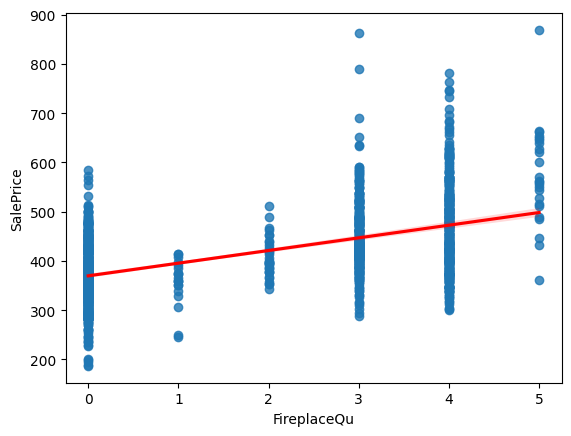

0.542766419864909

In [9]:
sns.regplot(data=df_train, x='FireplaceQu', y='SalePrice', line_kws={'color':'r'})
plt.show()

df_train.corr(numeric_only=True)['FireplaceQu']['SalePrice']

In [10]:
#######################################################################
# dummy encoding
from sklearn.preprocessing import OneHotEncoder

dummy_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first', dtype=int).set_output(transform='pandas')

dummy_col = ['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Electrical',
               'Foundation','Heating','CentralAir','MSSubClass', 'MSZoning', 'Condition1',
               'MiscFeature', 'SaleType', 'SaleCondition', 'MasVnrType', 'Exterior2nd', 'Utilities']

## Feature Selection

In [11]:
features = ['TotalSF', 'LotFrontage', 'OverallQual', 'ExterQual', 'HeatingQC', 'FireplaceQu', 'Age', 'TotalBath', 'OverallGarageQual', 'OverallBsmtQual', 'KitchenQual']
df_train = df_train[['TotalSF', 'LotFrontage', 'OverallQual', 'ExterQual', 'HeatingQC', 'FireplaceQu', 'Age', 'TotalBath', 'OverallGarageQual', 'OverallBsmtQual', 'KitchenQual', 'SalePrice']]
df_test = df_test[features]

from sklearn.preprocessing import MinMaxScaler

mm_features = MinMaxScaler().set_output(transform='pandas')
mm_target = MinMaxScaler().set_output(transform='pandas')

df_train[features] = mm_features.fit_transform(df_train[features])
df_test = mm_features.transform(df_test)

df_train['SalePrice'] = mm_target.fit_transform(df_train[['SalePrice']])

## Model Fitting

### 1. Lasso Regression

In [12]:
##################################################################
# Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


lasso_model = LassoCV(alphas = np.logspace(-4,1,100), cv=5, random_state=33)

lasso_model = lasso_model.fit(X_train, y_train)

print(f'The best Lasso alpha is: {lasso_model.alpha_}')
print(f'Lasso Coefficients: {lasso_model.coef_}')

y_pred = lasso_model.predict(X_test)

print(f'The Lasso RMSE is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'The Lasso R2 score is: {r2_score(y_test, y_pred)}')

The best Lasso alpha is: 0.0001
Lasso Coefficients: [ 0.67742672  0.06277162  0.12568568  0.03768258  0.01475983  0.03624919
 -0.02332961  0.08284142  0.11076288  0.12123212  0.04517961]
The Lasso RMSE is: 0.06686970749230967
The Lasso R2 score is: 0.7190781674751178


### 2. Ridge Regression

In [13]:
##################################################################
# Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


ridge_model = RidgeCV(alphas = np.logspace(-4,1,100), cv=5)

ridge_model = ridge_model.fit(X_train, y_train)

print(f'The best Ridge alpha is: {ridge_model.alpha_}')
print(f'Ridge Coefficients: {ridge_model.coef_}')

y_pred = ridge_model.predict(X_test)

print(f'The Ridge RMSE is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'The Ridge R2 score is: {r2_score(y_test, y_pred)}')

The best Ridge alpha is: 0.06734150657750822
Ridge Coefficients: [ 0.67565327  0.0786699   0.12449658  0.03715766  0.0155689   0.03543155
 -0.02278092  0.08290622  0.12332409  0.12732437  0.04438828]
The Ridge RMSE is: 0.06754186032367192
The Ridge R2 score is: 0.7134023120440898


### 3. ElasticNet

In [14]:
##################################################################
# ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


elastic_model = ElasticNetCV(alphas = np.logspace(-4,1, 100), l1_ratio= np.linspace(0.1, 1, 50),cv=5, random_state=33)

elastic_model = elastic_model.fit(X_train, y_train)

print(f'The best Elastic alpha is: {elastic_model.alpha_}')
print(f'The best Elastic l-1 is: {elastic_model.l1_ratio_}')
print(f'Elastic Coefficients: {elastic_model.coef_}')

y_pred = elastic_model.predict(X_test)

print(f'The Elastic RMSE is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'The Elastic R2 score is: {r2_score(y_test, y_pred)}')

The best Elastic alpha is: 0.0001
The best Elastic l-1 is: 0.6877551020408164
Elastic Coefficients: [ 0.67234894  0.06838947  0.12571685  0.03763417  0.0149922   0.03613992
 -0.02306325  0.08343858  0.11556271  0.12307908  0.0450348 ]
The Elastic RMSE is: 0.06697384867897031
The Elastic R2 score is: 0.7182024850470472


## Submission

In [17]:
#######################################################
# Submission (0.14288)
y_pred = elastic_model.predict(df_test).reshape(-1,1)
y_pred = mm_target.inverse_transform(y_pred)
y_pred = np.square(y_pred).flatten()
y_pred = pd.DataFrame({
    'Id':test_id,
    'SalePrice':y_pred
})
y_pred.to_csv('~/Desktop/Submission.csv', index=False)

## Feature note

Continuous variable: 
- LotFrontage (C w/ LotArea):
    - Corr w/ target = 0.351799
    - Corr w/ others = LotArea (0.426095), TotalSF (0.462352), GarageArea (0.344997), TotalBsmtSF (0.392075), 1stFlrSF(0.457181), BsmtFinSF1 (0.233633)
- LotArea (C w/LotFrontage):
    - Corr w/ target = 0.263843
    - Corr w/ others = LotFrontage (0.426095)
- YearBuilt (C w/ YearRemodAdd):
    - Corr w/ target = 0.522897
    - Corr w/ others = TotalBsmtSF (0.391452), GarageArea (0.478954), TotalSF (0.335488)
- YearRemodAdd (C w/ YearBuilt):
    - Corr w/ target = 0.507101
    - Corr w/ others = GarageYrBlt (0.642277)
- MasVnrArea (N):
    - Corr w/ target = 0.477493
    - Corr w/ others = GrLivArea (0.390857), TotalSF (0.443391) 
- BsmtFinSF1 (N): 
    - Corr w/ target = 0.386420
    - Corr w/ others = TotalBsmtSF (0.522396), 1stFlrSF (0.445863), TotalSF (0.411084)
- BsmtFinSF2 (N):
    - Corr w/ target = -0.011378
    - Corr w/ others = NA
- BsmtUnfSF (N): 
    - Corr w/ target = 0.214479
    - Corr w/ others = NA
- TotalBsmtSF (N): 
    - Corr w/ target = 0.613581
    - Corr w/ others = LotFrontage (0.392075), OverallQual (0.537808), 1stFlrSF (0.819530), GarageArea (0.486665)
- 1stFlrSF (N): 
    - Corr w/ target = 0.605852
    - Corr w/ others = LotFrontage (0.457181), OverallQual (0.476224), TotalBsmtSF (0.819530), GrLivArea (0.566024), GarageArea (0.489782), TotalSF (0.797678)
- 2ndFlrSF (N):
    - Corr w/ target = 0.319334
    - Corr w/ others = GrLivArea (0.687501)
- LowQualFinSF (N): 
    - Corr w/ target = -0.025606
    - Corr w/ others = NA
- GrLivArea (N):
    - Corr w/ target = 0.708624
    - Corr w/ others = All
- BsmtFullBath (N):
    - Corr w/ target = 0.227122
    - Corr w/ others = NA
- BsmtHalfBath (N):
    - Corr w/ target = -0.016844
    - Corr w/ others = NA
- FullBath (N):
    - Corr w/ target = 0.560664
    - Corr w/ others = TotalSF (0.574403), TotRmsAbvGrd (0.554784)
- HalfBath (N):
    - Corr w/ target = 0.284108
    - Corr w/ others = NA
- BedroomAbvGr (N): 
    - Corr w/ target = 0.168213
    - Corr w/ others = NA
- KitchenAbvGr (N): 
    - Corr w/ target = -0.135907
    - Corr w/ others = NA
- TotRmsAbvGrd (Y):
    - Corr w/ target = 0.533723
    - Corr w/ others = TotalSF (0.678802)
- Fireplaces (Y):
    - Corr w/ target = 0.466929
    - Corr w/ others = TotalSF (0.475416)
- GarageYrBlt (N):
    - Corr w/ target = 0.486362
    - Corr w/ others = GarageArea (0.564567)
- GarageCars (N):
    - Corr w/ target = 0.640409
    - Corr w/ others = All
- GarageArea (N):
    - Corr w/ target = 0.623431
    - Corr w/ others = All
- WoodDeckSF (C w/ OpenPorchSF):
    - Corr w/ target = 0.324413
    - Corr w/ others = TotalSF (0.281459) 
- OpenPorchSF (C w/ WoodDeckSF):
    - Corr w/ target = 0.315856
    - Corr w/ others = TotalSF (0.342402)
- EnclosedPorch (N):
    - Corr w/ target = -0.128578
    - Corr w/ others = NA
- 3SsnPorch (N):
    - Corr w/ target = 0.044584
    - Corr w/ others = NA
- ScreenPorch (N):
    - Corr w/ target = 0.111447
    - Corr w/ others = NA
- PoolArea (N):
    - Corr w/ target = 0.092404
    - Corr w/ others = NA
- MiscVal (N):
    - Corr w/ target = -0.021190
    - Corr w/ others = NA
- MoSold (N):
    - Corr w/ target = 0.046432
    - Corr w/ others = NA
- YrSold (N):
    - Corr w/ target = -0.028923
    - Corr w/ others =  NA
- TotalSF (N): 
    - Corr w/ target = 0.778959
    - Corr w/ others = All



Discrete Variable:
- MSSubClass (N): 
    - Corr w/ target = -0.084284
    - Corr w/ others = NA
- MSZoning (N): 
    - Corr w/ target = -0.166872
    - Corr w/ others = NA
- Street (Y/D): 
    - Corr w/ target = 0.041036
    - Corr w/ others = NA
- Alley (N): 
    - Corr w/ target = 0.139868
    - Corr w/ others = NA
- LotShape (N):
    - Corr w/ target = -0.255580
    - Corr w/ others = NA
- LandContour (N):
    - Corr w/ target = 0.015453
    - Corr w/ others = NA
- Utilities (N):
    - Corr w/ target = -0.014314
    - Corr w/ others = NA
- LotConfig (N):
    - Corr w/ target = -0.067396
    - Corr w/ others = NA
- LandSlope (N):
    - Corr w/ target = 0.051152
    - Corr w/ others = NA
- Neighborhood (Y): df_train['Neighborhood'].map({10:0, 9:0, 17:0, 2:0, 17:1, 7:1, 3:1, 19:1, 1:1, 18:1, 12:1, 13:1,
11:2, 20:2, 8:2, 14:2, 0:2, 5:2, 4:2, 6:3, 24:3, 21:3, 23:3, 22:4, 15:4, 16:4})
    - Corr w/ target = 0.210851
    - Corr w/ others = NA
- Condition1 (N):
    - Corr w/ target = 0.091155
    - Corr w/ others = NA
- Condition2 (N):
    - Corr w/ target = 0.007513
    - Corr w/ others = NA
- BldgType (N):
    - Corr w/ target = -0.085591
    - Corr w/ others = NA
- HouseStyle (N):
    - Corr w/ target = 0.180163
    - Corr w/ others = NA
- OverallQual (Y): df_train['OverallQual'].map({1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:3, 9:4, 10:4})
    - Corr w/ target = 0.790982
    - Corr w/ others = MasVnrArea (0.411876), YearBuilt (0.572323), YearRemodAdd (0.550684), BsmtFinSF1 (0.239666), TotalBsmtSF (0.537808), 1stFlrSF (0.476224), GrLivArea (0.593007), TotalSF (0.664830)
- OverallCond (N): 
    - Corr w/ target = -0.077856
    - Corr w/ others = NA
- RoofStyle (Y/D): df_train['RoofStyle'].map({0:0, 2:0, 4:0, 5:0, 3:1, 1:1})
    - Corr w/ target = 0.222405
    - Corr w/ others = NA
- RoofMatl (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- Exterior1st (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- Exterior2nd (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- MasVnrType (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- ExterQual (Maybe, C w/ OverallQual):
- ExterCond (N):
- Foundation (N):
- BsmtQual (Maybe, C w/ OverallQual): df_train['BsmtQual'].map({1:0, 4:0, 3:1, 2:1, 0:2})
- BsmtCond (N): 
- BsmtExposure (N):
- BsmtFinType1 (N):
- BsmtFinType2 (N):
- Heating (N):
- HeatingQC (N): 
- CentralAir (Y/D):
- Electrical (Y/D): df_train['Electrical'].map({0:0, 1:0, 2:0, 3:0, 4:1, 5:0}), 0.241896
- KitchenQual (Maybe, C w/ OverallQual): df_train['KitchenQual'].map({1:0, 3:0, 2:1, 0:1}), 0.571018
- Functional (N):
- FireplaceQu (N):
- GarageType (N):
- GarageFinish (Y): 0.549247, df_train['GarageFinish'].map({3:0, 2:1, 1:2, 0:3})
- GarageQual (N):
- GarageCond (N):
- PavedDrive (Y/D): df_train['PavedDrive'].map({0:0, 1:0, 2:1}), 0.528002
- PoolQC (N):
- Fence (N):
- MiscFeature (N):
- SaleType (N):
- SaleCondition (N): 
